In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

In [4]:
all_states = pd.read_csv(f'../data/all_states.csv')

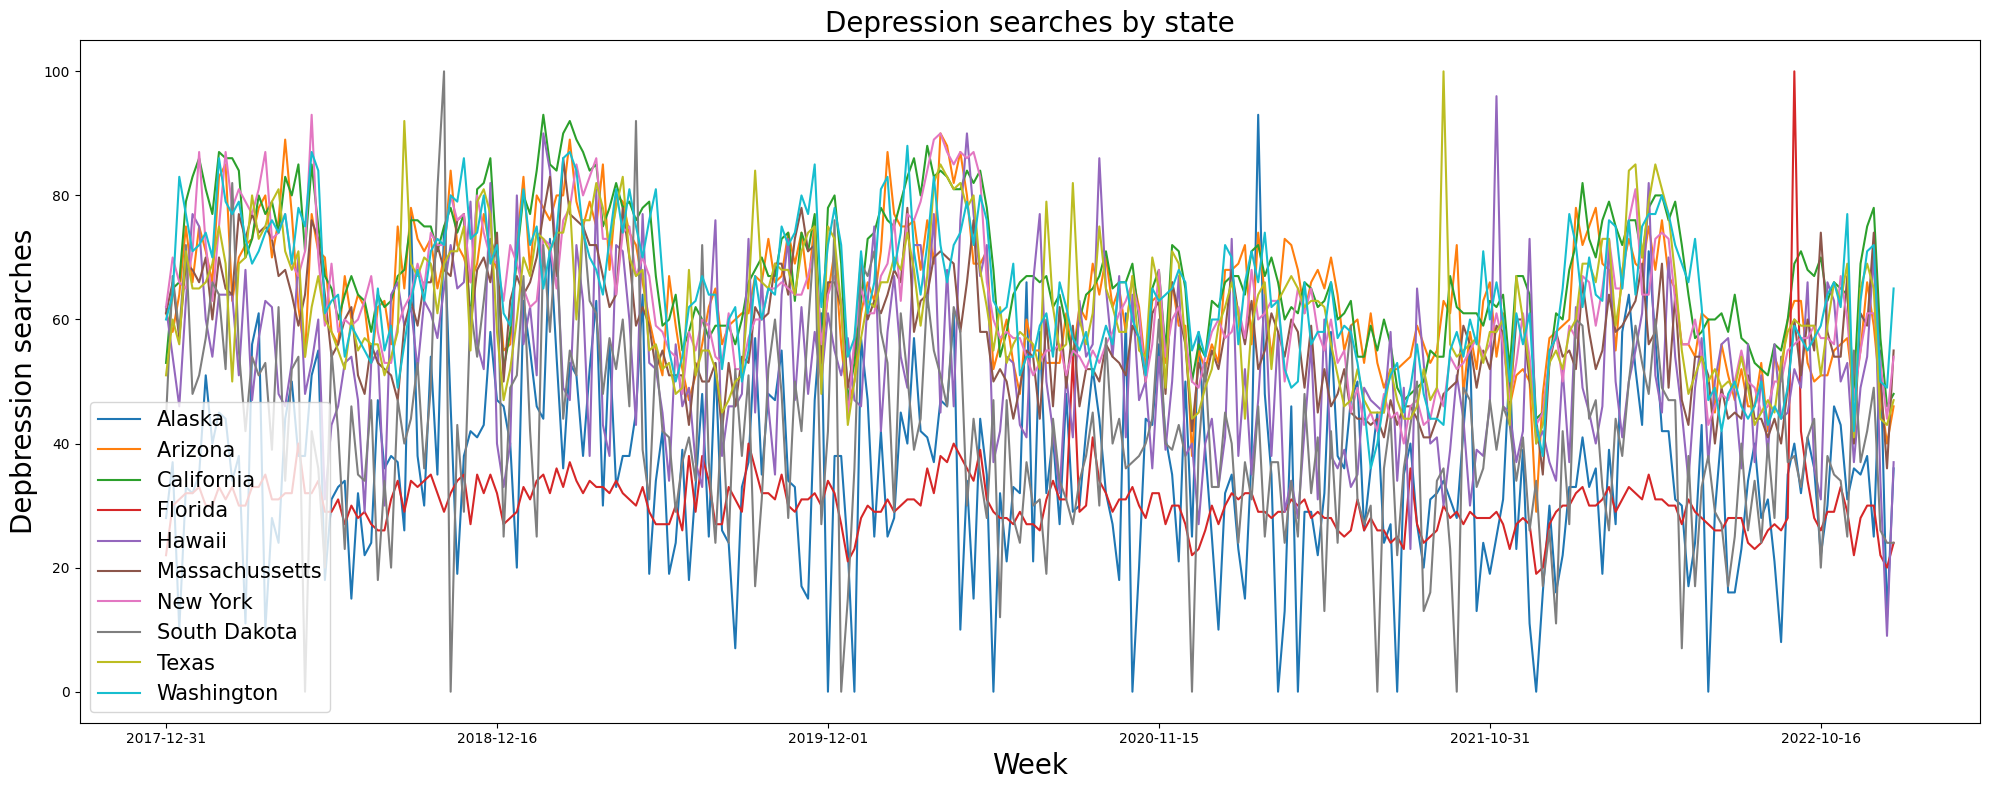

In [5]:
# Group by states and week

all_states.groupby(['week', 'state']).mean().unstack('state')['depression'].plot(figsize = (20, 8))
plt.xlabel('Week', size = 20)
plt.title('Depression searches by state', size = 20)
plt.ylabel('Depbression searches', size = 20)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.savefig('../images/Depression by state and week.jpeg');

Two much information for one plot, It is hard to see what is goen on for each state. The states needs to be grouped. We are looking at the COVID19 restrictions and will group states by restrictions levels.

In [6]:
def plot_search_by_week_restriction(search):
    '''
    Input: Search term
    Output: Plot for this search term by week and COVID Restrictions severity
    '''
    search_str = search.title()
    if search == 'mental_health':
        search_str = 'Mental Health'
    all_states.groupby(['week', 'covid_restrictions']).mean().unstack('covid_restrictions')[search].plot(figsize = (20, 8))
    plt.xlabel('Week', size = 20)
    plt.title(f'{search_str} searches by COVID Restrictions severity', size = 20)
    plt.ylabel(f'{search_str} searches', size = 20)
    plt.legend(fontsize = 15)
    plt.tight_layout()
    plt.savefig(f'../images/{search_str} by covid_restrictions and week.jpeg');


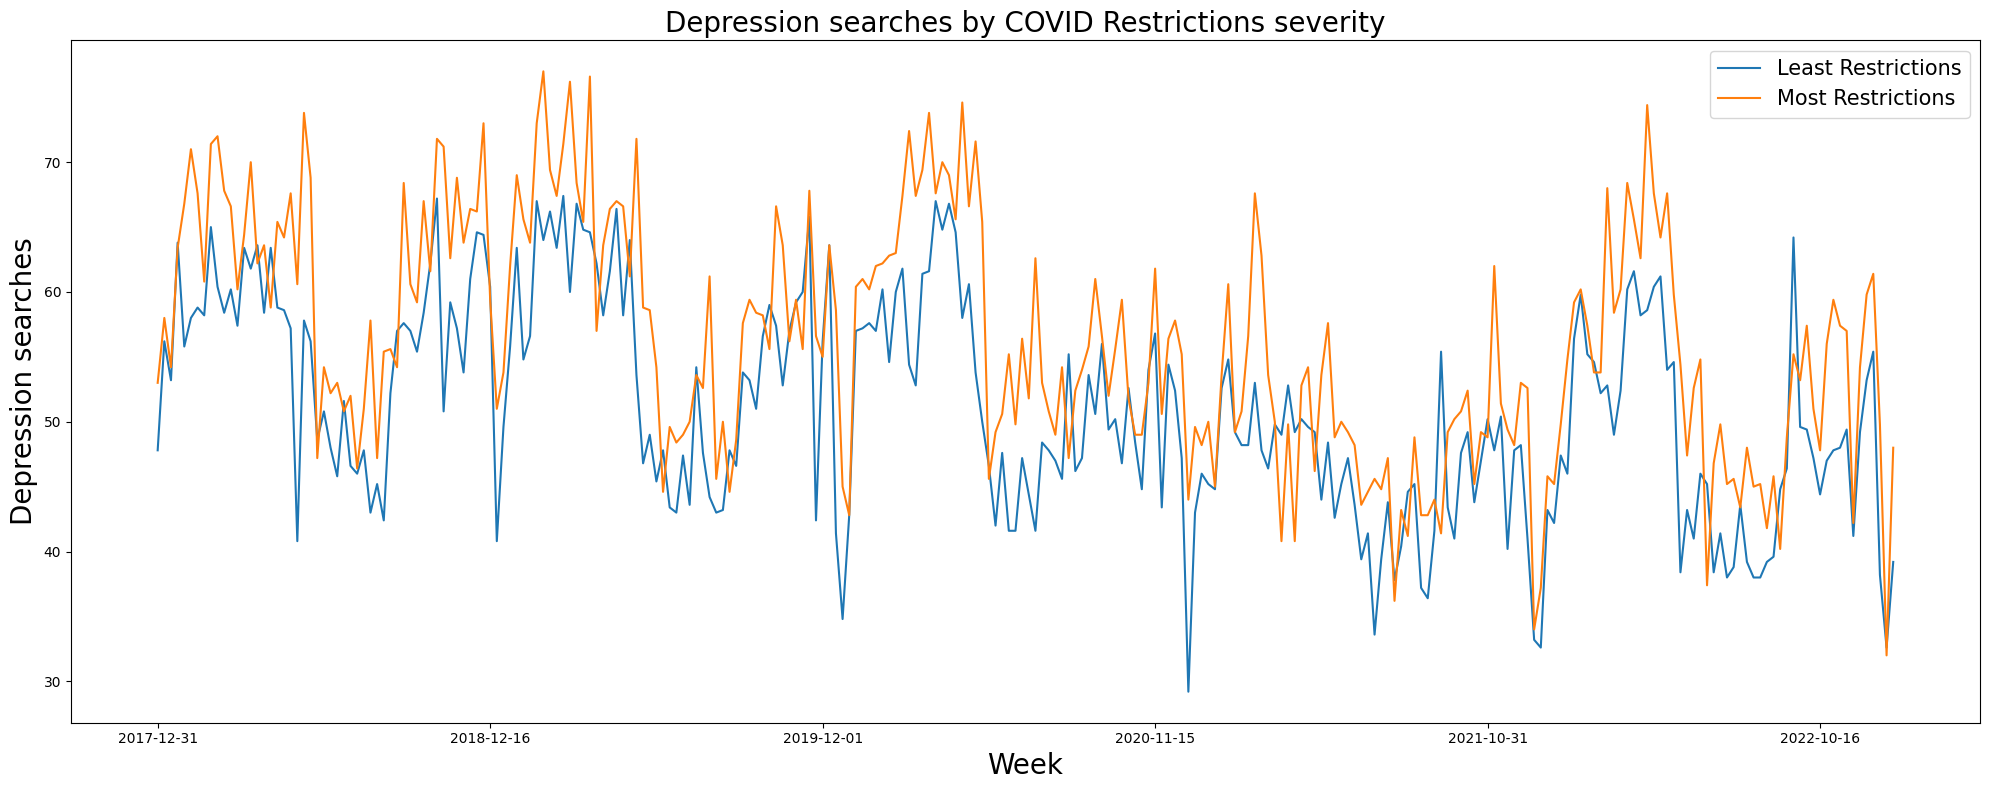

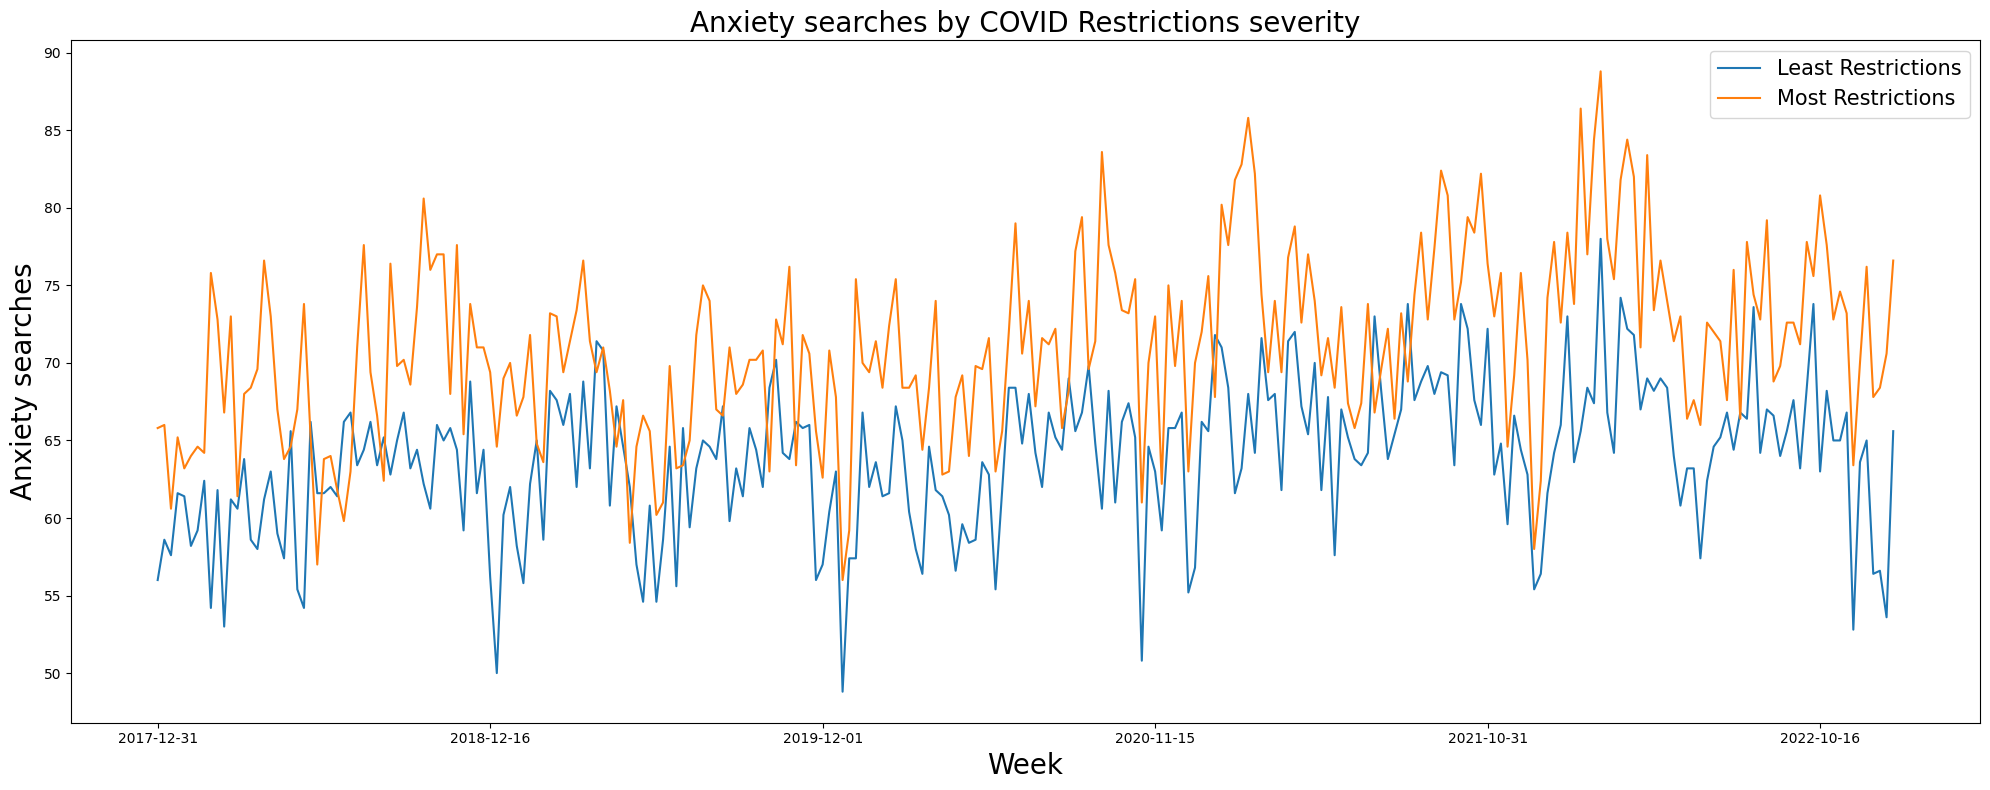

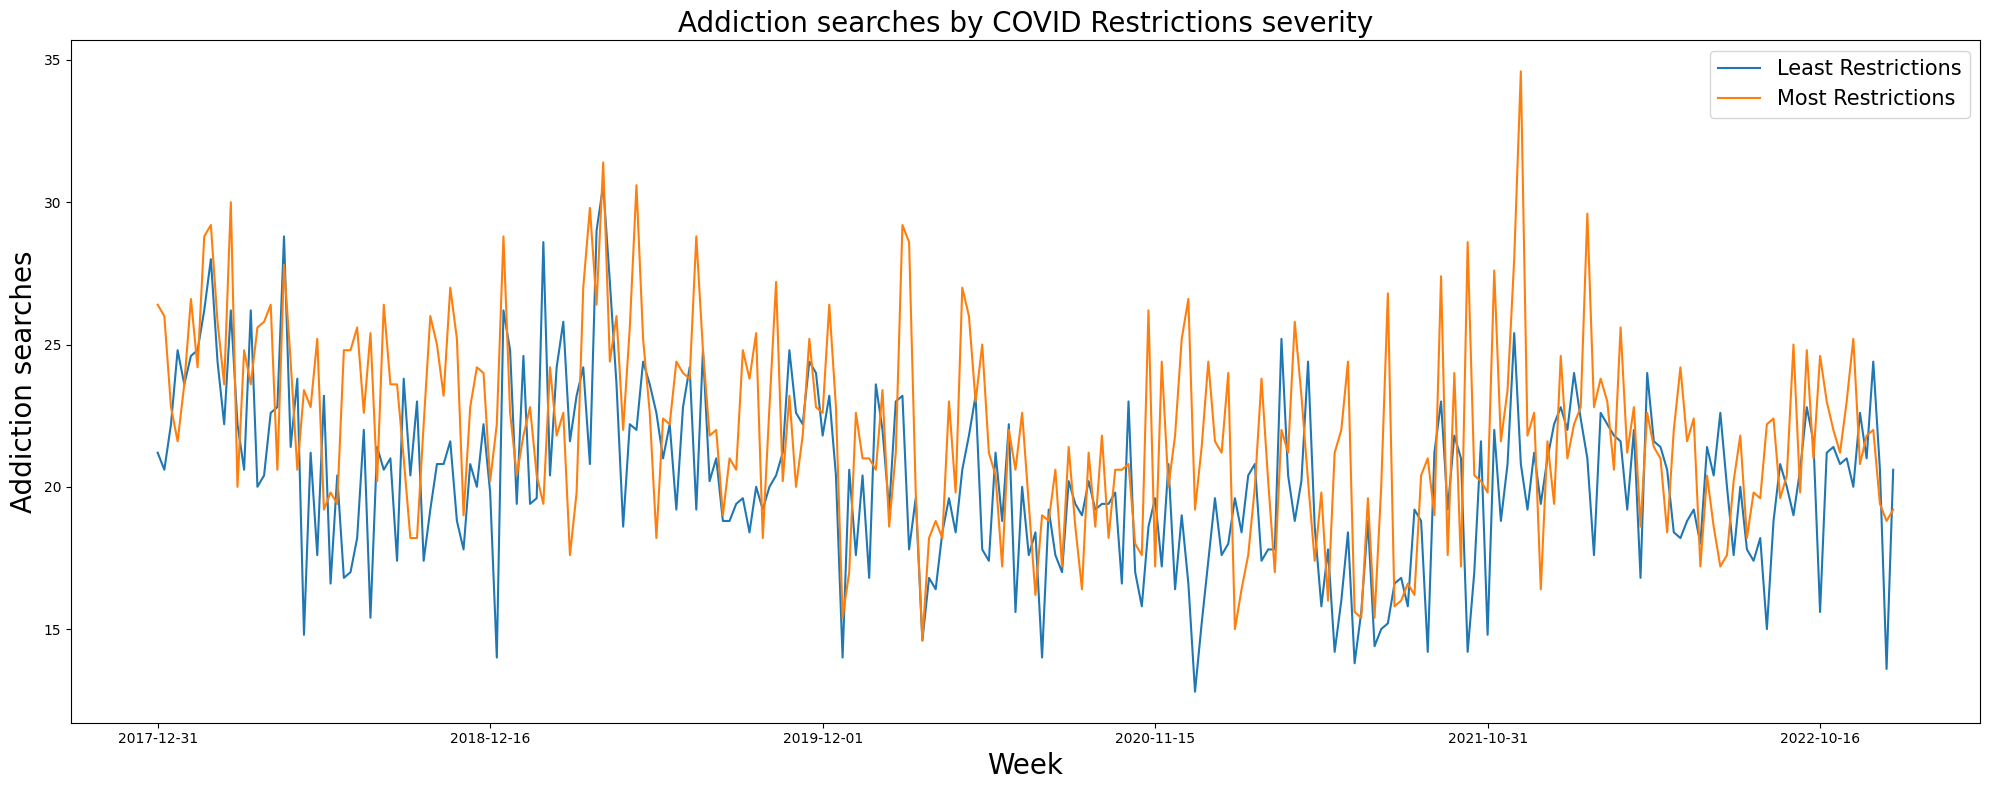

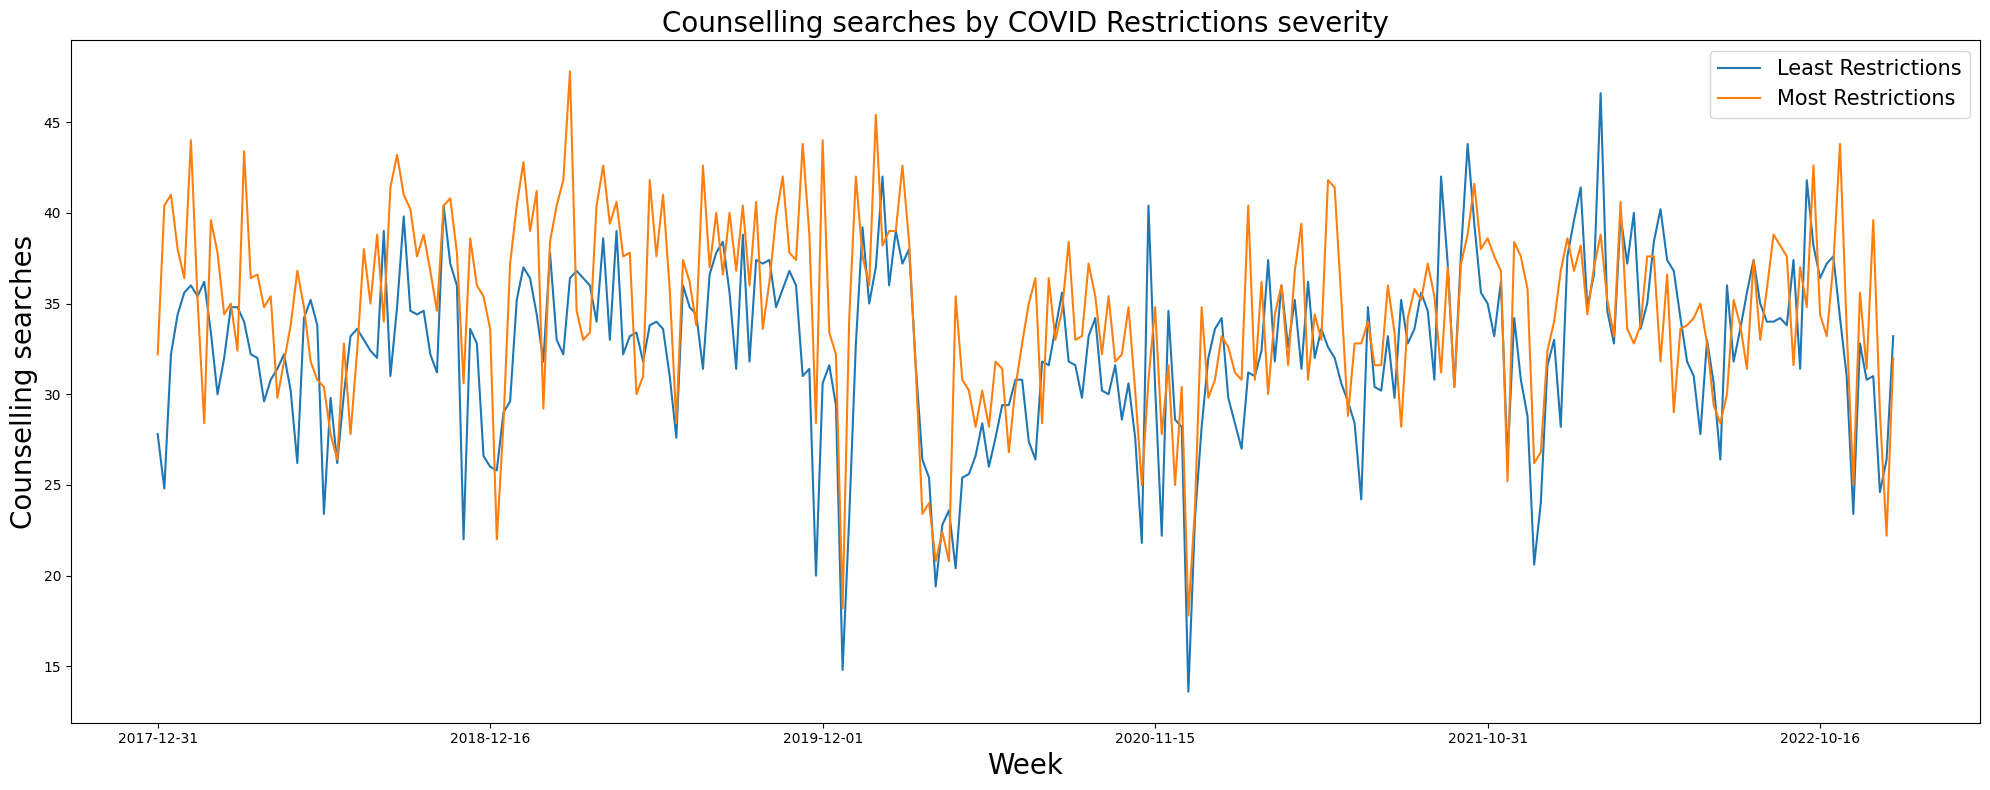

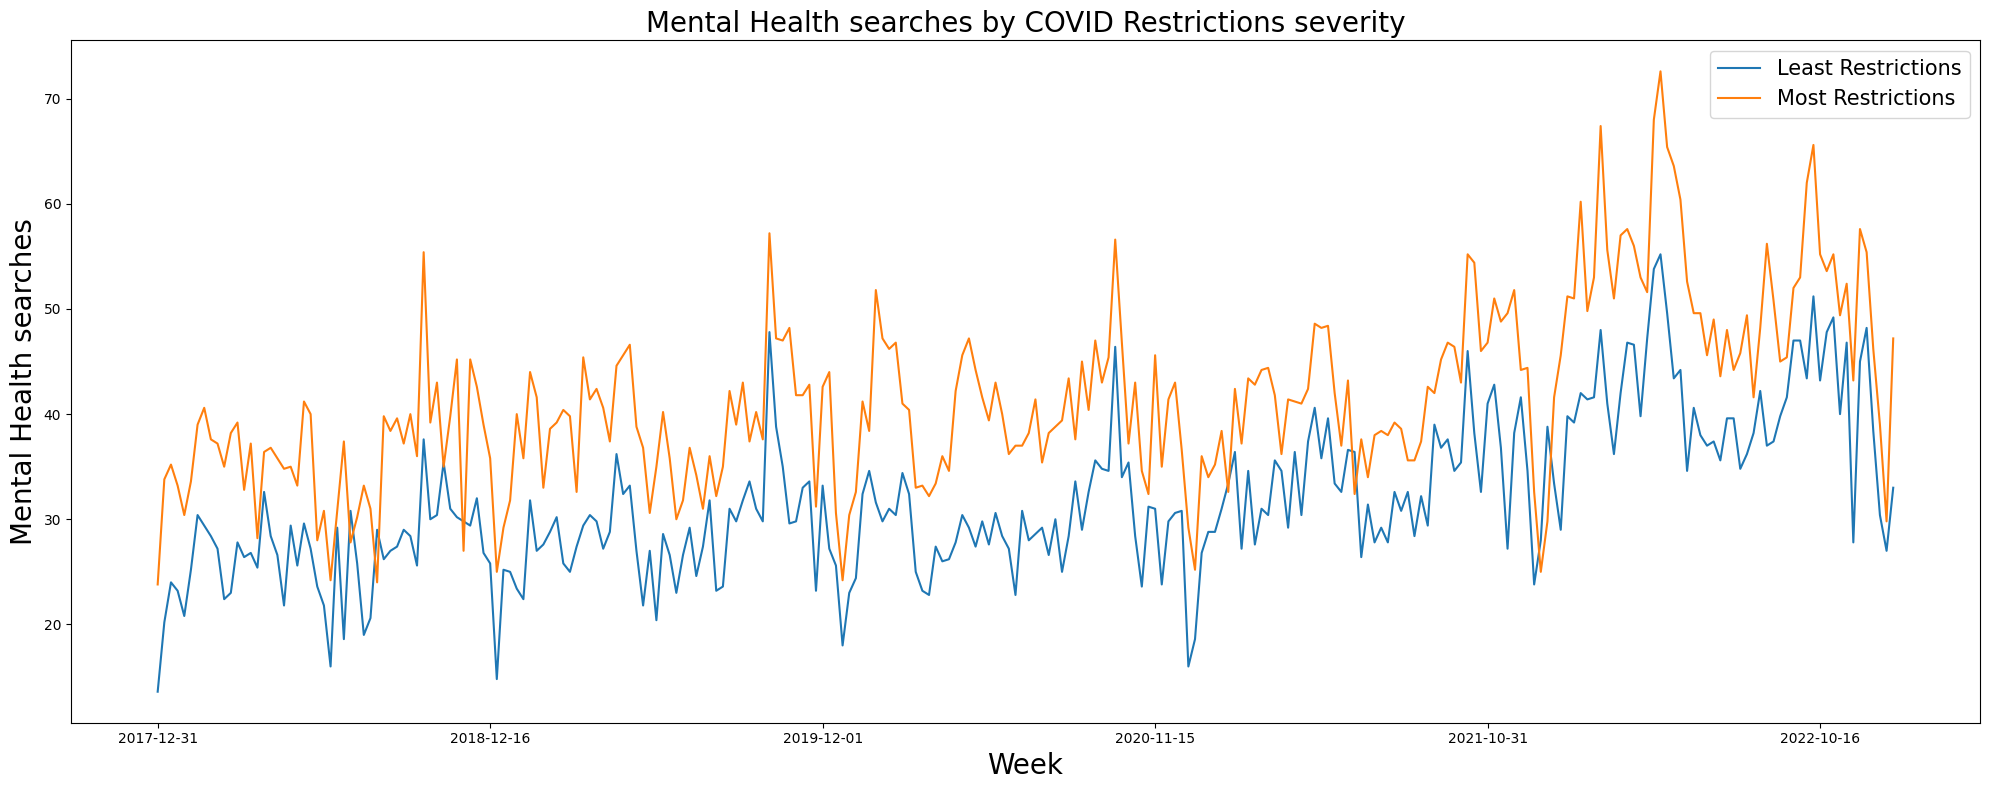

In [7]:
searches_list = ['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']

for search in searches_list:
    plot_search_by_week_restriction(search)

This groups provide better visuals and even for Mental Health search there is a noticible devision in searxches in the middle of 2020

In [9]:
most_restricted = pd.read_csv(f'../data/most_restricted.csv')
least_restricted = pd.read_csv(f'../data/least_restricted.csv')

For many time series models the data should be stationary.

In [11]:
# Check for Stationarity adapted from https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [12]:
# Check Most Restricted for stationarity
for name, column in most_restricted[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "depression" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.5433
 No. Lags Chosen       = 5
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0069. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "anxiety" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2912
 No. Lags Chosen       = 3
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0005. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "addiction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa

In [13]:
# Check Least Restricted for stationarity
for name, column in least_restricted[['depression', 'anxiety', 'addiction', 'counselling', 'mental_health']].iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "depression" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.9168
 No. Lags Chosen       = 2
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0019. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "anxiety" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8707
 No. Lags Chosen       = 4
 Critical value 1%     = -3.456
 Critical value 5%     = -2.873
 Critical value 10%    = -2.573
 => P-Value = 0.0023. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "addiction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significa